## Worksheet 1

Welcome to worksheet 1! This worksheet was designed to allow you to practice what was covered in the assigned readings & lectures/recordings. The labs problems will be more challenging than those in the worksheet, and the worksheet questions will help prepare you for them. Time will be provided to work on the worksheets in small groups during lecture, however it is not expected that you will complete the worksheet in this time. You are expected to spend some independent time working on the worksheet after lecture. 

**Worksheets are due on Saturdays at 6 pm, and must be submitted as `.ipynb` file OR the `zip` file generated at the last step (under Submission heading) in this worksheet/lab to Gradescope.**

### Getting your homework (i.e., worksheet and lab repositories) from GitHub.ubc.ca onto MDS's JuypterHub

Watch the video titled "Downloading the lab assignment from GitHub to JupyterLab" from DSCI 521, accessible [here](https://pages.github.ubc.ca/MDS-2022-23/DSCI_521_platforms-dsci_students/materials/appendices/submit-assignment.html).

### Worksheet mechanics

- **There is autograding in this lab, so please do not move or rename this file. Also, do not copy and paste cells, if you need to add new cells, create new cells via the "Insert a cell below" button instead.**

Run the cell below to load the libraries needed for this worksheet, and to check your answers as you go!

In [28]:
library(digest)
library(readxl)
library(testthat)
library(tidyverse)
options(repr.matrix.max.rows = 10)

# 1.0 Reading data into R

Before you can do any data analysis, you need to load your data into R! Thus we will spend some time practicing how to get these types of files into R! 

> The data we will use to explore this is the Palmer penguins data set! In this data set there are measures on the three species of penguins shown in this illustration below. You can learn more about the penguins and this data set [here](https://allisonhorst.github.io/palmerpenguins/). 
> <img src="img/lter_penguins.png" width=600>
>
> Illustration by [Allison Horst](https://www.allisonhorst.com/)

### Reading in local files

In the `data` directory of this repository we have provided you with 5 different versions of the same data set in different file formats. Your task is to read each of these into R using an appropriate function. 

As in lecture, we highly recommend using the `readr::read*` functions in comparison to the base R `read.*` functions because of performance. *Note - for excel files you will have to use the `readxl` package instead of `readr`.* **Do look at each file in the Jupyter editor and consult the [Data Import Cheatsheet](https://github.com/rstudio/cheatsheets/raw/main/data-import.pdf) to help you choose the correct function and function argument.** 

Prove to us that you were successful by outputting the head of each data frame once it is read in.

### Exercise 1.1
rubric={autograde:1}

Read in file named `penguins.csv` from the `data` directory. Bind the name `penguins_csv` to the data frame.

In [29]:
penguins_csv <- NULL
# BEGIN SOLUTION NO PROMPT
penguins_csv <- read_csv("data/penguins.csv") 
# END SOLUTION
head(penguins_csv)

Rows: 344 Columns: 8
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (3): species, island, sex
dbl (5): bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


In [30]:
# TESTS
expect_equal(nrow(penguins_csv), 344)
expect_equal(ncol(penguins_csv), 8)
expect_equal(paste(tolower(sort(colnames(penguins_csv))), collapse = ""), 'bill_depth_mmbill_length_mmbody_mass_gflipper_length_mmislandsexspeciesyear')
expect_equal(round(as.numeric(sum(penguins_csv$bill_length_mm, na.rm = TRUE))), 15021)

### Exercise 1.3
rubric={autograde:1}

Read in file named `penguins-meta-data.csv` from the `data` directory. Bind the name `penguins_meta_data` to the data frame.

*Hint, if there are no column names you can add them by adding `col_names = c("col1", "col2", ...)` as an argument to the `read_*` function. If you need to do this, use the column names from the other penguins data sets above.*

In [31]:
penguins_meta_data <- NULL
# BEGIN SOLUTION NO PROMPT
penguins_meta_data <- read_csv("data/penguins-meta-data.csv", 
                               skip = 9,
                               n_max = 344,
                               col_names = c("species", "island", "bill_length_mm", 
                                           "bill_depth_mm", "flipper_length_mm", 
                                           "body_mass_g", "sex", "year"))
# END SOLUTION
head(penguins_meta_data)
tail(penguins_meta_data)

Rows: 344 Columns: 8
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (3): species, island, sex
dbl (5): bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Chinstrap,Dream,45.7,17.0,195,3650,female,2009
Chinstrap,Dream,55.8,19.8,207,4000,male,2009
Chinstrap,Dream,43.5,18.1,202,3400,female,2009
Chinstrap,Dream,49.6,18.2,193,3775,male,2009
Chinstrap,Dream,50.8,19.0,210,4100,male,2009
Chinstrap,Dream,50.2,18.7,198,3775,female,2009


In [32]:
# TESTS
expect_equal(nrow(penguins_meta_data), 344)
expect_equal(ncol(penguins_meta_data), 8)
expect_equal(paste(tolower(sort(colnames(penguins_meta_data))), collapse = ""), 'bill_depth_mmbill_length_mmbody_mass_gflipper_length_mmislandsexspeciesyear')
expect_equal(round(as.numeric(sum(penguins_meta_data$bill_length_mm, na.rm = TRUE))), 15021)

### Exercise 1.3
rubric={autograde:1}

Read in file named `penguins2.csv` from the `data` directory. Bind the name `penguins2` to the data frame.

*Hint, if there are no column names you can add them by adding `col_names = c("col1", "col2", ...)` as an argument to the `read_*` function. If you need to do this, use the column names from the other penguins data sets above. Look at the file properly; this format is common in some European countries. Then, identify the `read_*` function that can read this kind of format.*

In [33]:
penguins2 <- NULL
# BEGIN SOLUTION NO PROMPT
penguins2 <- read_csv2("data/penguins2.csv", 
                       col_names = c("species", "island", "bill_length_mm", 
                                     "bill_depth_mm", "flipper_length_mm", 
                                     "body_mass_g", "sex", "year"))
# END SOLUTION
head(penguins2)

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 344 Columns: 8
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ";"
chr (3): species, island, sex
dbl (5): bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


In [34]:
# TESTS
expect_equal(nrow(penguins2), 344)
expect_equal(ncol(penguins2), 8)
expect_equal(paste(tolower(sort(colnames(penguins2))), collapse = ""), 'bill_depth_mmbill_length_mmbody_mass_gflipper_length_mmislandsexspeciesyear')
expect_equal(round(as.numeric(sum(penguins2$bill_length_mm, na.rm = TRUE))), 15021)

### Exercise 1.4
rubric={autograde:1}

Read in file named `penguins.xlsx` from the `data` directory. Bind the name `penguins_excel` to the data frame.

In [35]:
penguins_excel <- NULL
# BEGIN SOLUTION NO PROMPT
penguins_excel <- read_excel("data/penguins.xlsx", sheet = "penguins")
# END SOLUTION
head(penguins_excel)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


In [36]:
# TESTS
expect_equal(nrow(penguins_excel), 344)
expect_equal(ncol(penguins_excel), 8)
expect_equal(paste(tolower(sort(colnames(penguins_excel))), collapse = ""), 'bill_depth_mmbill_length_mmbody_mass_gflipper_length_mmislandsexspeciesyear')
expect_equal(round(as.numeric(sum(penguins_excel$bill_length_mm, na.rm = TRUE))), 15021)

### Exercise 1.5: writing files from R
rubric={accuracy:1}

Use R and the `write_csv` function from the {readr} package to write a csv file that uses comma as the delimiter, and has column names. Create the file using the `penguins_csv` data frame, name it `my_penguins.csv`, and write it to the `data` directory.

In [37]:
# YOUR CODE HERE
# BEGIN SOLUTION NO PROMPT
write_csv(penguins_csv, "data/my_penguins.csv")
# END SOLUTION

In [38]:
# TESTS
expect_equal(nrow(readr::read_csv("data/my_penguins.csv")), 344)
expect_equal(ncol(readr::read_csv("data/my_penguins.csv")), 8)
expect_equal(paste(tolower(sort(colnames(readr::read_csv("data/my_penguins.csv")))), collapse = ""), 'bill_depth_mmbill_length_mmbody_mass_gflipper_length_mmislandsexspeciesyear')
expect_equal(round(as.numeric(sum((readr::read_csv("data/my_penguins.csv"))$bill_length_mm, na.rm = TRUE))), 15021)

Rows: 344 Columns: 8
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (3): species, island, sex
dbl (5): bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 344 Columns: 8
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (3): species, island, sex
dbl (5): bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 344 Columns: 8
── Column specification ───────────────────────────────────────────────

# 2.0 Data wrangling with {dplyr} functions

Once you get your data into R, you often want to transform the data into a more suitable format for data anlaysis. We often refer to this process lovingly as data wrangling. Let's get familiar using some functions from the {dpyr} package functions for data wrangling. {dpyr} is an R packages that is part of the {tidyverse} meta-package.

> 
> <img src="img/dplyr_wrangling.png" width=600>
> 
> Illustration by [Allison Horst](https://www.allisonhorst.com/)

Let's continue to use the 🐧 (penguins) data set to explore these functions! Here's a reminder of what it looks like:

In [39]:
# run this cell to view the penguins data set
penguins_csv

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Chinstrap,Dream,55.8,19.8,207,4000,male,2009
Chinstrap,Dream,43.5,18.1,202,3400,female,2009
Chinstrap,Dream,49.6,18.2,193,3775,male,2009


**Also, don't forget to consult the [Data transformation cheat sheet](https://github.com/rstudio/cheatsheets/blob/main/data-transformation.pdf) if you need help remembering how the {dplyr} functions work.**

### Exercise 2.1
rubric={accuracy:1}

Use the {dplyr} `filter()` function to create a smaller data frame (from the `penguins_csv` data frame) with just the rows for female penguins. Bind the name `female_penguins` to this smaller data frame.

In [40]:
female_penguins <- NULL
# BEGIN SOLUTION NO PROMPT
female_penguins <- filter(penguins_csv, sex == "female")
# END SOLUTION
head(female_penguins)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,38.9,17.8,181,3625,female,2007
Adelie,Torgersen,41.1,17.6,182,3200,female,2007
Adelie,Torgersen,36.6,17.8,185,3700,female,2007


In [41]:
# TESTS
expect_equal(nrow(female_penguins), 165)
expect_equal(ncol(female_penguins), 8)
expect_equal(paste(tolower(sort(colnames(female_penguins))), collapse = ""), 'bill_depth_mmbill_length_mmbody_mass_gflipper_length_mmislandsexspeciesyear')
expect_equal(round(as.numeric(sum(female_penguins$bill_length_mm, na.rm = TRUE))), 6946)

### Exercise 2.2
rubric={accuracy:1}

Use the {dplyr} `arrange()` function to find the smallest penguin (as measured by `body_mass_g`) in the `penguins_csv` data frame. Bind the name `ordered_by_size` to this smaller data frame.

In [42]:
ordered_by_size <- NULL
# BEGIN SOLUTION NO PROMPT
ordered_by_size <- arrange(penguins_csv, body_mass_g)
# END SOLUTION
head(ordered_by_size)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Chinstrap,Dream,46.9,16.6,192,2700,female,2008
Adelie,Biscoe,36.5,16.6,181,2850,female,2008
Adelie,Biscoe,36.4,17.1,184,2850,female,2008
Adelie,Biscoe,34.5,18.1,187,2900,female,2008
Adelie,Dream,33.1,16.1,178,2900,female,2008
Adelie,Torgersen,38.6,17.0,188,2900,female,2009


In [43]:
# TESTS
expect_equal(nrow(ordered_by_size), 344)
expect_equal(ncol(ordered_by_size), 8)
expect_equal(paste(tolower(sort(colnames(ordered_by_size))), collapse = ""), 'bill_depth_mmbill_length_mmbody_mass_gflipper_length_mmislandsexspeciesyear')
expect_equal(round(as.numeric(sum(ordered_by_size$bill_length_mm, na.rm = TRUE))), 15021)
expect_equal(ordered_by_size$species[1], 'Chinstrap')
expect_equal(ordered_by_size$bill_length_mm[1], 46.9)

### Exercise 2.3
rubric={accuracy:1}

Now use the {dplyr} `slice()` function to extract the row containing the smallest penguin (as measured by `body_mass_g`) from the `ordered_by_size` data frame. Bind the name `smallest_penguin` to this smaller data frame.

In [44]:
smallest_penguin <- NULL
# BEGIN SOLUTION NO PROMPT
smallest_penguin <- slice(ordered_by_size, 1)
# END SOLUTION
smallest_penguin

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Chinstrap,Dream,46.9,16.6,192,2700,female,2008


In [45]:
# TESTS
expect_equal(nrow(smallest_penguin), 1)
expect_equal(ncol(smallest_penguin), 8)
expect_equal(paste(tolower(sort(colnames(smallest_penguin))), collapse = ""), 'bill_depth_mmbill_length_mmbody_mass_gflipper_length_mmislandsexspeciesyear')
expect_equal(smallest_penguin$species[1], 'Chinstrap')
expect_equal(smallest_penguin$bill_length_mm[1], 46.9)

### Exercise 2.4
rubric={accuracy:1}

Now use the {dplyr} `select()` and `pull` functions to extract the weight the smallest penguin (as measured by `body_mass_g`) from the `smallest_penguin` data frame. Bind the name `smallest_weight` to this smaller data frame.

In [46]:
smallest_weight <- NULL
# BEGIN SOLUTION NO PROMPT
smallest_weight <- select(smallest_penguin, body_mass_g)
smallest_weight <- pull(smallest_penguin, body_mass_g)
# END SOLUTION
smallest_weight

[1] 2700

In [47]:
# TESTS
expect_true(is.numeric(smallest_weight))
expect_equal(length(smallest_weight), 1)
expect_equal(smallest_weight, 2700)

### Exercise 2.5 (optional)
(not graded - for practice only)

Use the base R pipe operator (`|>`) to rewrite the code below so that it is in a pipeline instead of using intermediate objects. The name `piped_penguins` should be bound to the final data frame you create.

In [48]:
piped_penguins <- filter(penguins_csv, species == "Gentoo", sex == "male", body_mass_g < 5000 )
piped_penguins <- mutate(piped_penguins, body_mass_kg = body_mass_g / 1000) 
piped_penguins <- select(piped_penguins, species, island, year, body_mass_kg, sex, year, -body_mass_g)
# YOUR CODE HERE
# BEGIN SOLUTION NO PROMPT
piped_penguins <- penguins_csv |>
    filter(species == "Gentoo", sex == "male", body_mass_g < 5000 ) |>
    mutate(body_mass_kg = body_mass_g / 1000) |> 
    select(species, island, year, body_mass_kg, sex, year, -body_mass_g)
# END SOLUTION
head(piped_penguins)

species,island,year,body_mass_kg,sex
<chr>,<chr>,<dbl>,<dbl>,<chr>
Gentoo,Biscoe,2008,4.750,male
Gentoo,Biscoe,2009,4.925,male


### Visualize some penguins data!

You've been working hard to read in and wrangle data, let's reward ourselves with a beautiful data visualization using the penguins data set! Run the cell below to view the output of the data visualization code we provide you. You will learn how to do this yourself in DSCI 531 - Data Visualization I.

Warning message:
“Removed 11 rows containing missing values (geom_point).”


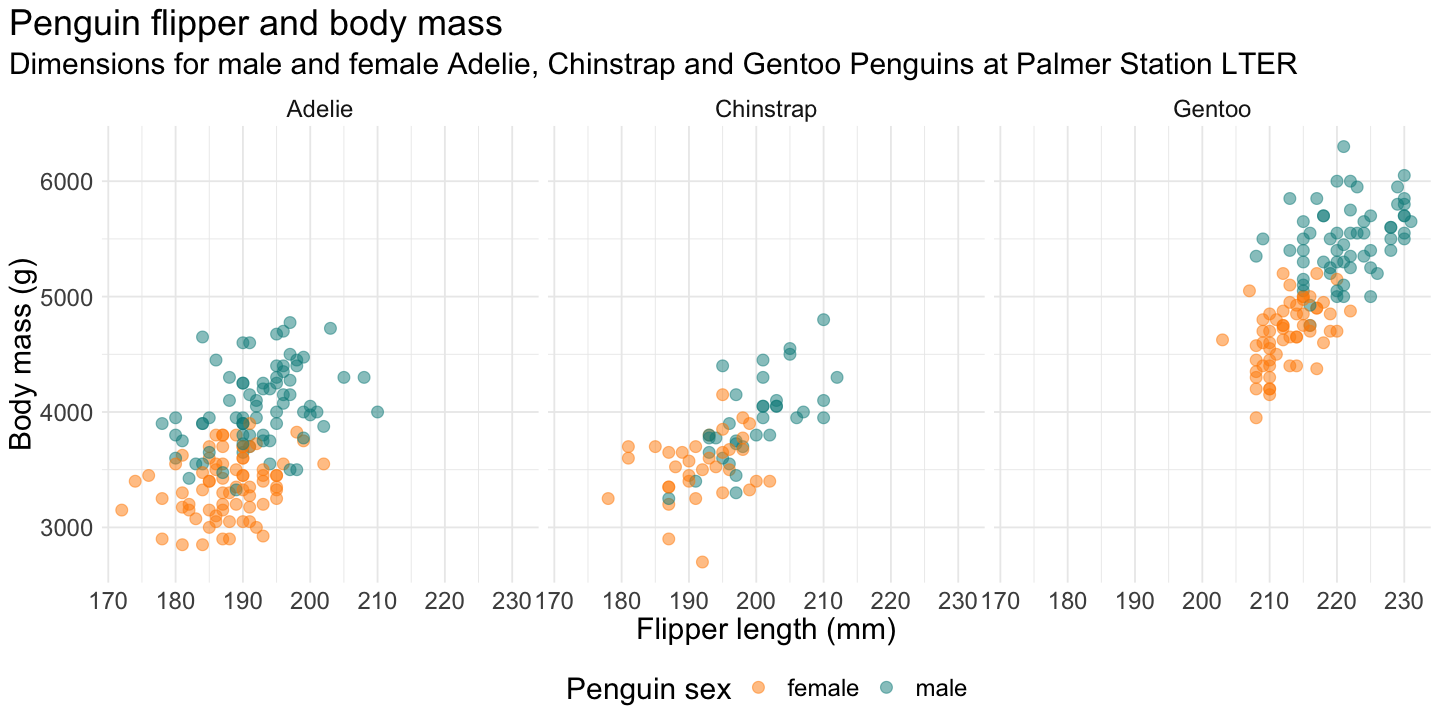

In [49]:
options(repr.plot.width = 12, repr.plot.height = 6)
penguins_plot <- ggplot(penguins_csv, aes(x = flipper_length_mm,
                            y = body_mass_g)) +
    geom_point(aes(color = sex), size = 3, alpha = 0.5) +
    theme_minimal() +
    scale_color_manual(values = c("darkorange","cyan4"), na.translate = FALSE) +
    labs(title = "Penguin flipper and body mass",
         subtitle = "Dimensions for male and female Adelie, Chinstrap and Gentoo Penguins at Palmer Station LTER",
         x = "Flipper length (mm)",
         y = "Body mass (g)",
         color = "Penguin sex") +
    theme(legend.position = "bottom",
          legend.background = element_rect(fill = "white", color = NA),
          plot.title.position = "plot",
          plot.caption = element_text(hjust = 0, face= "italic"),
          plot.caption.position = "plot",
          text = element_text(size = 18)) +
    facet_wrap(~species)
penguins_plot

*Attribution: Data visualization code above is derived from [this vignette](https://allisonhorst.github.io/palmerpenguins/articles/examples.html) in the palmerpenguins R package.*

# 3.0 Tidying data with {tidyr} functions

Data for statistical analysis, machine learning or data visualization needs to be in a tidy format. Tidy data satisfy the following three criteria:

- each row is a single observation,
- each column is a single variable, and
- each value is a single cell (i.e., its row and column position in the data frame is not shared with another value)

Importantly, what statistical question you are asking dictates what an observation is, and what a variable is. We will revisit this in more detail in DSCI 552 - Statistical inference and Computation I. For now, let's practice using two very useful functions for wrangling our data into a tidy format, `pivot_wider` and `pivot_longer`. These functions are from the {tidyr} package, another R packages that is part of the {tidyverse} meta-package.

> 
> <img src="img/tidyr.png" width=600>
> 
> Illustration by [Allison Horst](https://www.allisonhorst.com/)

Let's now practice identifying tidy data, as well as doing the data tidying with the {tidyr} functions `pivot_longer` and `pivot_wider`.

### Exercise 3.1
rubric={autograde:1}

The data below shows wine ratings given for 3 wines by 5 different wine tasters. We are interested in seeing if Taster or Wine type influences the rating. Given that motivation, which arrangement of the data set shown below is "tidy". 

##### Data set 1:

|     Taster       | Chardonnay | Pinot Grigio | Pinot Blanc |
|------------|------------|--------------|-----------------|
| 001 | 75         | 89           | 92              |
| 002 | 89         | 88           | 89              |
| 003 | 72         | 90           | 95              |
| 004 | 85         | 81           | 90              |
| 005 | 83         | 89           | 88              |

##### Data set 2:
|   Wine | Taster 001 | Taster 002 | Taster 003 | Taster 004 | Taster 005 |
|------------|------------|--------------|-----------------|-------|---------|
| Chardonnay | 75         | 89           | 72              | 85 | 83
| Pinot Grigio | 89         | 88           | 90             | 81 | 89 |
| Pinot Blanc | 92         | 89           | 95              | 90 | 88 |

##### Data set 3:

| Taster           | Wine | Rating | 
|------------|------------|----|
| 001 |  Chardonnay |  75         | 
| 002 |  Chardonnay | 89         | 
| 003 |  Chardonnay |72         |  
| 004 |  Chardonnay |85         | 
| 005 | Chardonnay | 83         |  
| 001 |  Pinot Grigio | 89         | 
| 002 |  Pinot Grigio | 88         | 
| 003 |  Pinot Grigio | 90         | 
| 004 |  Pinot Grigio | 81         | 
| 005 |  Pinot Grigio | 90         | 
| 001 |  Pinot Blanc | 92         | 
| 002 | Pinot Blanc | 89         |
| 003 | Pinot Blanc | 95         | 
| 004 | Pinot Blanc | 90         | 
| 005 | Pinot Blanc | 88         | 

##### Data set 4: 
| Taster    | Chardonnay Rating | 
|------------|------------|
| 001 |  75         | 
| 002 |   89         | 
| 003 |  72         |  
| 004 | 85         | 
| 005 | 83         |  

| Taster           | Pinot Grigio Rating | 
|------------|------------|
| 001 |   89         | 
| 002 |  88         | 
| 003 |  90         | 
| 004 | 81         | 
| 005 |  90         | 

| Taster           | Pinot Blanc Rating | 
|------------|------------|
| 001 |   92         | 
| 002 |  89         |
| 003 |  95         | 
| 004 |  90         | 
| 005 |  88         | 

Assign your answer to an object called `answer3.1`. Write your answer as either `"dataset1"`, `"dataset2"`, `"dataset3"`, or `"dataset4"`.

In [50]:
answer3.1 <- NULL
# BEGIN SOLUTION NO PROMPT
answer3.1 <- "dataset3"
# END SOLUTION
answer3.1

[1] "dataset3"

In [51]:
# TESTS
expect_equal(digest(answer3.1), '0ba7db6d528c5aa96395582539ce6da1')

#### Exercise 3.2
rubric={autograde:1}

The data shown below is also untidy if we consider the statistical question: what is the average flight duration from New York to Bermuda and whether date, airline or flight number influences this? The reason that it is untidy is that the data for a single observation (a single flight) is spread acorss two rows. Use `pivot_wider` to tidy this data frame. Your final data frame should only include the columns you would use in this statistical analysis (e.g., `airline`, `date`, `flight`, and `duration`).  Bind the name `flight_tidy2` to the tidy data frame you create.

In [52]:
flight_untidy2 <- tibble(airline = c("UA", "UA", "DL", "DL", "WN", "WN", "UA", "UA", "DL", "DL", 
                                     "WN", "WN"),
                        date = c("2019-08-14", "2019-08-14", "2019-08-14", "2019-08-14", "2019-08-14", 
                                 "2019-08-14", "2019-08-15", "2019-08-15", "2019-08-16", "2019-08-16", 
                                 "2019-08-15", "2019-08-15"),
                        flight = c("1545", "1545", "1743", "1743", "1122", "1122", "1545", "1545", 
                                   "1741", "1741", "1122", "1122"),
                        event = c("departure", "arrival", "departure", "arrival", "departure", 
                                  "arrival", "departure", "arrival", "departure", "arrival", "departure", 
                                  "arrival"), 
                        time = c(515, 830, 527, 845, 535, 835, 520, 840, 530, 835, 533, 833))

flight_untidy2

airline,date,flight,event,time
<chr>,<chr>,<chr>,<chr>,<dbl>
UA,2019-08-14,1545,departure,515
UA,2019-08-14,1545,arrival,830
DL,2019-08-14,1743,departure,527
DL,2019-08-14,1743,arrival,845
WN,2019-08-14,1122,departure,535
⋮,⋮,⋮,⋮,⋮
UA,2019-08-15,1545,arrival,840
DL,2019-08-16,1741,departure,530
DL,2019-08-16,1741,arrival,835


In [53]:
flight_tidy2 <- NULL
# BEGIN SOLUTION NO PROMPT
flight_tidy2 <- flight_untidy2 %>% 
  pivot_wider(names_from = event, values_from = time) %>% 
  mutate(duration = arrival - departure) %>% 
  select(-arrival, -departure)
# END SOLUTION
flight_tidy2

airline,date,flight,duration
<chr>,<chr>,<chr>,<dbl>
UA,2019-08-14,1545,315
DL,2019-08-14,1743,318
WN,2019-08-14,1122,300
UA,2019-08-15,1545,320
DL,2019-08-16,1741,305
WN,2019-08-15,1122,300


In [54]:
# TESTS
expect_equal(nrow(flight_tidy2), 6)
expect_equal(ncol(flight_tidy2), 4)
expect_equal(paste(tolower(sort(colnames(flight_tidy2))), collapse = ""), 'airlinedatedurationflight')
expect_equal(round(as.numeric(sum(flight_tidy2$duration, na.rm = TRUE))), 1858)

Congratulations! You are done the worksheet!!! Pat yourself on the back, and submit your worksheet to Gradescope!